# **Telco Customer Churn Prediction**

[dataset from Kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

**Import the library needed for analysis**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier #binary classification
from sklearn.svm import SVC # support vector machine
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

**Load the dataset**

In [4]:
# Load the dataset
file_path = "/content/telco_churn.csv"
df = pd.read_csv(file_path)

**Exploring dataset information**

In [5]:
df.info() #EDA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.head() #supervised machine learning (data punya label: churn/not)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Check missing values**

In [7]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


**Summary statistics (for numerical type data)**

In [8]:
print(df.describe()) #only works for numerical data

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


**Visualize target label distribution**

<ipython-input-9-8312ff77d5e3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df['Churn'], palette=['#AFCBFF', '#E6A57D'])


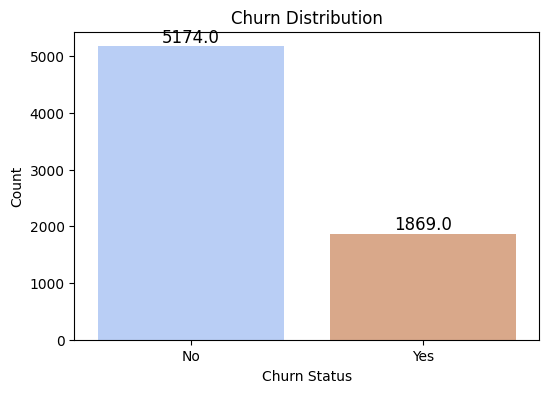

In [9]:
# Visualize target variable distribution
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=df['Churn'], palette=['#AFCBFF', '#E6A57D'])

# Add labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='normal')
plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.title('Churn Distribution')
plt.show()

<ipython-input-10-9157606fe4ba>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Churn'], y=df['MonthlyCharges'], palette='coolwarm')


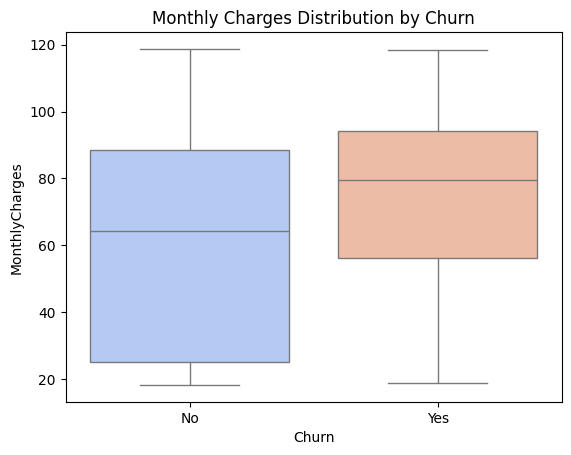

In [10]:
# Boxplot for Monthly Charges based on Churn
sns.boxplot(x=df['Churn'], y=df['MonthlyCharges'], palette='coolwarm')
plt.title('Monthly Charges Distribution by Churn')
plt.show()

**Data preprocessing**

**Convert TotalCharges from object to numeric**

In [11]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

**Fill missing values of feature TotalCharges with median**


In [28]:
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True) #data imputation

<ipython-input-28-da5f43879eec>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True) #data imputation


**Drop customerID column because it is irrelevant to the analysis**

In [13]:
# Drop customer ID (not useful for modeling)
df.drop(columns=["customerID"], inplace=True) #no used

**Label encoding for categorical independent variables , label encoding means transform categorical data into numerical data type.**

In [14]:
# Encode categorical variables bcs this type of machine learning just understanding num data
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    if col != "Churn":  # Skip target variable
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

**Label encoding for target / dependent variables**

In [15]:
# Encode target variable
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

**Create a new feature (feature engineering)**

In [16]:
# Feature Engineering
df["AvgMonthlySpending"] = df["TotalCharges"] / (df["tenure"] + 1)  # Avoid division by zero

**Dataset condition after preprocessing**

In [17]:
df.head() #ready for modeling

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,AvgMonthlySpending
0,0,0,1,0,1,0,1,0,0,2,...,0,0,0,0,1,2,29.85,29.85,0,14.925000
1,1,0,0,0,34,1,0,0,2,0,...,0,0,0,1,0,3,56.95,1889.50,0,53.985714
2,1,0,0,0,2,1,0,0,2,2,...,0,0,0,0,1,3,53.85,108.15,1,36.050000
3,1,0,0,0,45,0,1,0,2,0,...,2,0,0,1,0,0,42.30,1840.75,0,40.016304
4,0,0,0,0,2,1,0,1,0,0,...,0,0,0,0,1,2,70.70,151.65,1,50.550000


**Train a machine learning model**

Split the dataset into training and test set

In [18]:
# Split data
X = df.drop(columns=["Churn"])
y = df["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #random state for consistent spliting data

**Using RandomForestClassifier Model**

In [19]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
rf_metrics = {
    "Model": "Random Forest",
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1 Score": f1_score(y_test, y_pred_rf)
}

print("Random Forest Performance:")
print(rf_metrics)

Random Forest Performance:
{'Model': 'Random Forest', 'Accuracy': 0.7984386089425124, 'Precision': 0.663003663003663, 'Recall': 0.48525469168900803, 'F1 Score': 0.5603715170278638}


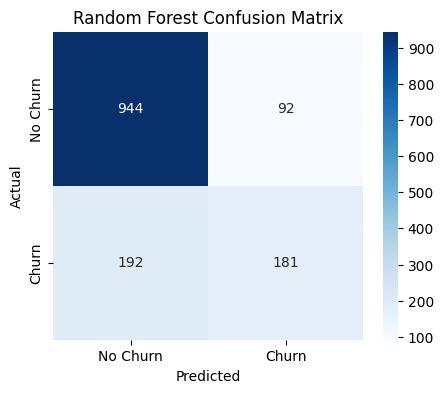

In [21]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

**Using LogisticRegression Model**

In [22]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
# Predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate Logistic Regression
lr_metrics = {
    "Model": "Logistic Regression",
    "Accuracy": accuracy_score(y_test, y_pred_lr),
    "Precision": precision_score(y_test, y_pred_lr),
    "Recall": recall_score(y_test, y_pred_lr),
    "F1 Score": f1_score(y_test, y_pred_lr)
}

print("Logistic Regression Performance:")
print(lr_metrics)

Logistic Regression Performance:
{'Model': 'Logistic Regression', 'Accuracy': 0.8041163946061036, 'Precision': 0.6611295681063123, 'Recall': 0.5335120643431636, 'F1 Score': 0.5905044510385756}


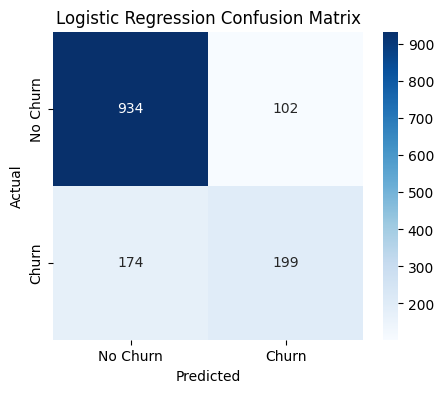

In [24]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

**Using XGBClassifier Model**

In [25]:
xgb_model = XGBClassifier(n_estimators=100, eval_metric="logloss", random_state=42)

xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost
xgb_metrics = {
    "Model": "XGBoost",
    "Accuracy": accuracy_score(y_test, y_pred_xgb),
    "Precision": precision_score(y_test, y_pred_xgb),
    "Recall": recall_score(y_test, y_pred_xgb),
    "F1 Score": f1_score(y_test, y_pred_xgb)
}

print("XGBoost Performance:")
print(xgb_metrics)

XGBoost Performance:
{'Model': 'XGBoost', 'Accuracy': 0.7977288857345636, 'Precision': 0.6419354838709678, 'Recall': 0.5335120643431636, 'F1 Score': 0.582723279648609}


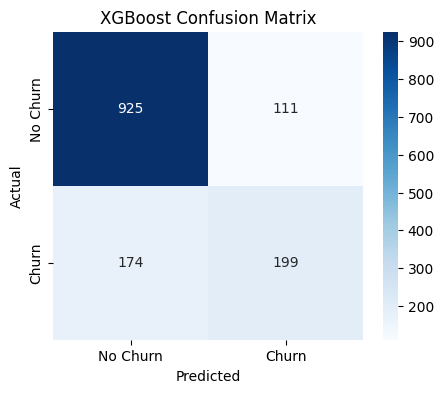

In [26]:
# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.show()

In [27]:
# Create DataFrame to compare model results
comparison_df = pd.DataFrame([rf_metrics, lr_metrics, xgb_metrics])

# Display model performance comparison
print("\nModel Performance Comparison:")
print(comparison_df)


Model Performance Comparison:
                 Model  Accuracy  Precision    Recall  F1 Score
0        Random Forest  0.798439   0.663004  0.485255  0.560372
1  Logistic Regression  0.804116   0.661130  0.533512  0.590504
2              XGBoost  0.797729   0.641935  0.533512  0.582723


Final Model: **Logistic Regression**

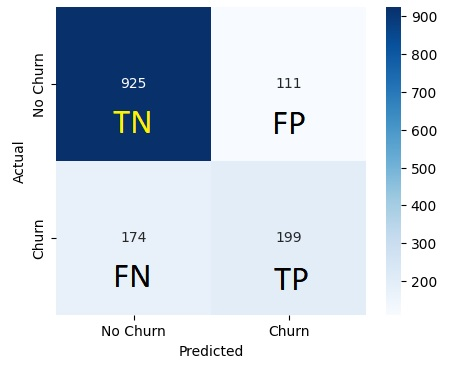